# Classificação de imagens com openCV e tensorflow
- (RNA)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libs

In [2]:
import cv2
import numpy as np
import os 
import zipfile 
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import save_model

In [3]:
tf.__version__

'2.12.0'

## Extração dos dados não estruturados

In [4]:
# Extração dos pixels da imagem
path = '/content/drive/MyDrive/Computer Vision/Visão Computacional Guia Completo-20230526T132742Z-001/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'
zip_obj = zipfile.ZipFile(path, mode='r')
zip_obj.extractall('./')
zip_obj.close()

In [5]:
diretorio = '/content/homer_bart_1'

arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]

In [6]:
arquivos

['/content/homer_bart_1/.DS_Store',
 '/content/homer_bart_1/bart1.bmp',
 '/content/homer_bart_1/bart10.bmp',
 '/content/homer_bart_1/bart100.bmp',
 '/content/homer_bart_1/bart101.bmp',
 '/content/homer_bart_1/bart102.bmp',
 '/content/homer_bart_1/bart103.bmp',
 '/content/homer_bart_1/bart104.bmp',
 '/content/homer_bart_1/bart105.bmp',
 '/content/homer_bart_1/bart106.bmp',
 '/content/homer_bart_1/bart108.bmp',
 '/content/homer_bart_1/bart109.bmp',
 '/content/homer_bart_1/bart11.bmp',
 '/content/homer_bart_1/bart110.bmp',
 '/content/homer_bart_1/bart111.bmp',
 '/content/homer_bart_1/bart112.bmp',
 '/content/homer_bart_1/bart113.bmp',
 '/content/homer_bart_1/bart114.bmp',
 '/content/homer_bart_1/bart115.bmp',
 '/content/homer_bart_1/bart116.bmp',
 '/content/homer_bart_1/bart117.bmp',
 '/content/homer_bart_1/bart118.bmp',
 '/content/homer_bart_1/bart119.bmp',
 '/content/homer_bart_1/bart12.bmp',
 '/content/homer_bart_1/bart120.bmp',
 '/content/homer_bart_1/bart121.bmp',
 '/content/homer_ba

## Pré-processamento

In [7]:
# tratamento de imagens 
largura = 128
altura = 128

In [8]:
# pixels da imagem
imagens = []
# classes homer e bart
classes = []

In [9]:
for imagem_caminho in arquivos:
    #print(imagem_caminho)
    try:

        imagem = cv2.imread(imagem_caminho)
        # altura e largura
        (h, w) = imagem.shape[:2]
    except:
        continue

    imagem = cv2.resize(imagem, (largura, altura))
    imagem = cv2.cvtColor(imagem , cv2.COLOR_BGR2GRAY)
    #plt.imshow(imagem)
    #plt.show()

    # converter de matriz para vetor
    imagem =  imagem.ravel()
    #print(imagem.shape)
    # add na lista de imagens
    imagens.append(imagem)
    # add classes
    nome_imagem = os.path.basename(os.path.normpath(imagem_caminho))
    #print(nome_imagem)
    if nome_imagem.startswith('b'):
        classe = 0
    else:
        classe = 1
    classes.append(classe)
    #print(classe)


In [10]:
# exemplo bart
imagens[0], classes[0]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 0)

In [11]:
# exemplo homer
imagens[200], classes[200]

(array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), 1)

## Split inicial

In [12]:
X = np.asarray(imagens)
y = np.asarray(classes)

In [13]:
X.shape

(269, 16384)

In [14]:
y.shape

(269,)

In [15]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

## Normalização dos dados

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X)
X = scaler.transform(X)

## Divisão treino e teste

In [18]:
X.shape , y.shape

((269, 16384), (269,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((215, 16384), (215,), (54, 16384), (54,))

## Modelagem

    - Construção da rede neural

In [21]:
# neurônios
(16384 + 2 ) / 2

8193.0

In [22]:
network1 = tf.keras.models.Sequential()
# camadas
network1.add(tf.keras.layers.Dense(input_shape = (16384,), units=8183, activation='relu') )
# camada oculta
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
# camada saída
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
# estrurura da rede
network1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8183)              134078455 
                                                                 
 dense_1 (Dense)             (None, 8193)              67051512  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,138,161
Trainable params: 201,138,161
Non-trainable params: 0
_________________________________________________________________


In [24]:
# treinamento
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# histórico
historico = network1.fit(X_train, y_train, epochs=40)

Epoch 1/40
7/7 [==============================] - 6s 47ms/step - loss: 120.9536 - accuracy: 0.4744
Epoch 2/40
7/7 [==============================] - 0s 44ms/step - loss: 43.3583 - accuracy: 0.5488
Epoch 3/40
7/7 [==============================] - 0s 43ms/step - loss: 38.3437 - accuracy: 0.5023
Epoch 4/40
7/7 [==============================] - 0s 43ms/step - loss: 18.9356 - accuracy: 0.5256
Epoch 5/40
7/7 [==============================] - 0s 43ms/step - loss: 1.2231 - accuracy: 0.5860
Epoch 6/40
7/7 [==============================] - 0s 43ms/step - loss: 0.7540 - accuracy: 0.5395
Epoch 7/40
7/7 [==============================] - 0s 43ms/step - loss: 0.6353 - accuracy: 0.6791
Epoch 8/40
7/7 [==============================] - 0s 44ms/step - loss: 0.6519 - accuracy: 0.5907
Epoch 9/40
7/7 [==============================] - 0s 43ms/step - loss: 0.6476 - accuracy: 0.6233
Epoch 10/40
7/7 [==============================] - 0s 43ms/step - loss: 0.5982 - accuracy: 0.6651
Epoch 11/40
7/7 [=======

## Avaliação na base de treino

In [26]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

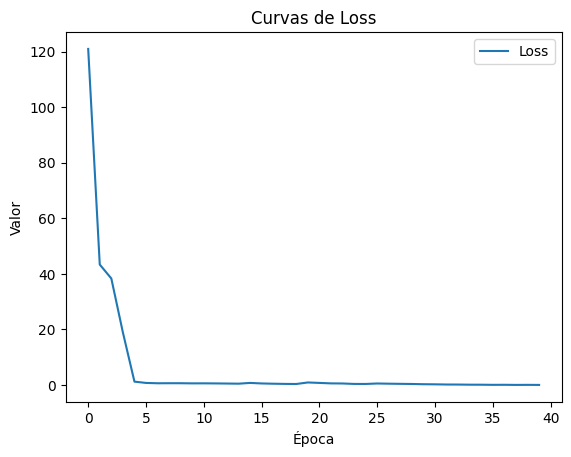

In [27]:
plt.plot(historico.history['loss'], label='Loss')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Curvas de Loss')
plt.legend()
plt.show()

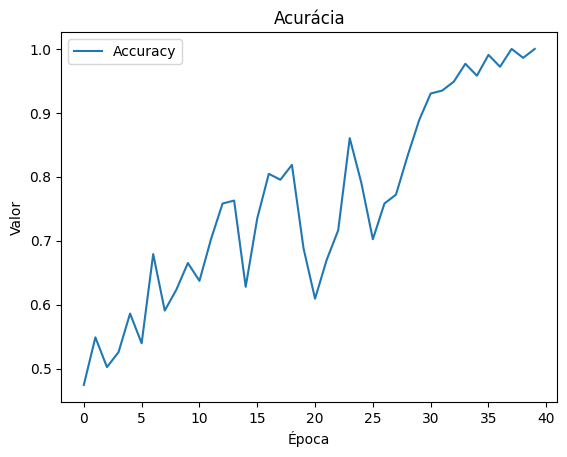

In [28]:
plt.plot(historico.history['accuracy'], label='Accuracy')
plt.xlabel('Época')
plt.ylabel('Valor')
plt.title('Acurácia')
plt.legend()
plt.show()

## Teste

In [29]:
previsoes = network1.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [30]:
previsoes

array([[0.16662173],
       [0.9997358 ],
       [0.18255708],
       [0.76056474],
       [0.98220956],
       [0.38858044],
       [0.9994282 ],
       [0.9920989 ],
       [0.9625177 ],
       [0.992334  ],
       [0.56289047],
       [0.99998987],
       [0.9901663 ],
       [0.98230547],
       [0.7849881 ],
       [0.42586783],
       [0.84604245],
       [0.9911515 ],
       [0.43079016],
       [0.10858477],
       [0.05838564],
       [0.9855843 ],
       [0.20636767],
       [0.7648727 ],
       [0.6145659 ],
       [0.99076056],
       [0.2523758 ],
       [0.19791031],
       [0.89417213],
       [0.99776804],
       [0.9608015 ],
       [0.9998857 ],
       [0.9852601 ],
       [0.08291751],
       [0.99996006],
       [0.34299207],
       [0.95630795],
       [0.20048392],
       [0.87453955],
       [0.22402751],
       [0.99862754],
       [0.99703217],
       [0.52811307],
       [0.3854509 ],
       [0.48524097],
       [0.87852895],
       [0.99751174],
       [0.347

In [31]:
previsoes = (previsoes > 0.5)

In [32]:
previsoes

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [33]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [34]:
# 0 = Bart
# 1 = Homer
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61        28
           1       0.61      0.85      0.71        26

    accuracy                           0.67        54
   macro avg       0.69      0.67      0.66        54
weighted avg       0.70      0.67      0.66        54



In [35]:
cm = confusion_matrix(y_test, previsoes)

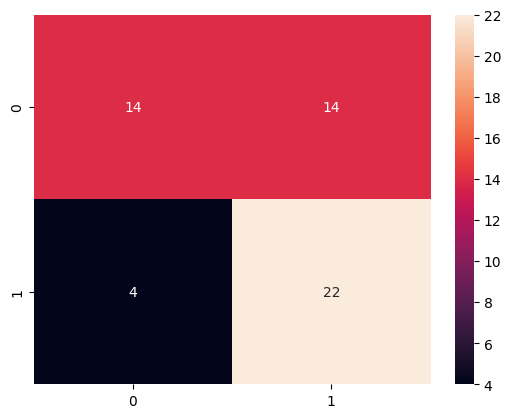

In [36]:
sns.heatmap(cm, annot=True);

## Salvar e carregar a rede neural 

In [37]:
model = network1.to_json()
with open('network1.json', 'w') as json_file:
    json_file.write(model)

In [38]:
network1_saved = save_model(network1, 'weights1.hdf5')

In [39]:
with open('network1.json') as json:
    network1 = json.read()

In [40]:
network1_loaded = tf.keras.models.model_from_json(network1)
network1_loaded.load_weights('/content/weights1.hdf5')

In [41]:
# recompile 
network1_loaded.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['acurracy'])

In [42]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8183)              134078455 
                                                                 
 dense_1 (Dense)             (None, 8193)              67051512  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,138,161
Trainable params: 201,138,161
Non-trainable params: 0
_________________________________________________________________


In [65]:
sample_indices = np.random.choice(X_test.shape[0], size=1, replace=True)
sample = X_test[sample_indices]
imagem_teste = scaler.inverse_transform(sample.reshape(1, -1))

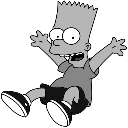

In [66]:
cv2_imshow(imagem_teste.reshape(128, 128))

## Prever nova imagem

In [67]:
imagem_teste

array([[255., 255., 255., ..., 255., 255., 255.]])

In [68]:
if network1_loaded.predict(imagem_teste)[0][0] < 0.5:
    print('Bart')
else:
    print('Homer')

1/1 [==============================] - 0s 18ms/step
Bart
